In [1]:
#Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder



In [2]:
#Importing datasets

df1=pd.read_csv('/content/drive/MyDrive/Data science Datasets/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df2=pd.read_csv('/content/drive/MyDrive/Data science Datasets/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')
df3=pd.read_csv('/content/drive/MyDrive/Data science Datasets/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df4=pd.read_csv('/content/drive/MyDrive/Data science Datasets/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df5=pd.read_csv('/content/drive/MyDrive/Data science Datasets/Resale flat prices based on registration date from Jan-2017 onwards.csv')


In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(198412, 11)


In [4]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [5]:
#since the 'remaining_lease' column is missing for the first 3 dataset, we'll analyse the columns and impute the data for those columns.
#total_lease=Remaining_lease+(month_sale - lease_commence_date)
#we can apply this formula to find the Total lease formuala
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
df5.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,198412.000000,198412.000000,1.984120e+05
mean,96.990798,1996.205476,5.090481e+05
std,24.024782,14.157232,1.781176e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.780000e+05
50%,93.000000,1996.000000,4.800000e+05
75%,112.000000,2011.000000,6.100000e+05
max,366.700000,2021.000000,1.600000e+06


#Pre-processing

In [7]:
df6=pd.concat([df1,df2,df3,df4,df5]).reset_index(drop=True)
df6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [8]:
df6.shape

(944615, 11)

#Data Jar

In [9]:
#1)Structured data - yes, Structured
#2)correct format - yes
#3)Duplicate - yes, dropped
#4)Missing values handling - yes, corrected
#5)outlier-

In [10]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944615 entries, 0 to 944614
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                944615 non-null  object 
 1   town                 944615 non-null  object 
 2   flat_type            944615 non-null  object 
 3   block                944615 non-null  object 
 4   street_name          944615 non-null  object 
 5   storey_range         944615 non-null  object 
 6   floor_area_sqm       944615 non-null  float64
 7   flat_model           944615 non-null  object 
 8   lease_commence_date  944615 non-null  int64  
 9   resale_price         944615 non-null  float64
 10  remaining_lease      235565 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 79.3+ MB


In [11]:
df6.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [12]:
df6.shape

(944615, 11)

In [13]:
 #Duplicates dropped
 df6=df6.drop_duplicates()

In [14]:
df6.shape

(942707, 11)

In [15]:
#only remaining_lease	 column has missing values, we can modify this.
df6.isna().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [16]:
df6.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
944610,2025-01,YISHUN,5 ROOM,502B,YISHUN ST 51,07 TO 09,112.0,Improved,2018,776000.0,92 years 01 month
944611,2025-01,YISHUN,5 ROOM,871,YISHUN ST 81,07 TO 09,122.0,Improved,1988,738000.0,62 years 04 months
944612,2025-01,YISHUN,5 ROOM,851,YISHUN ST 81,10 TO 12,127.0,Improved,1988,740000.0,62 years 04 months
944613,2025-01,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,1008000.0,62 years 07 months
944614,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,800000.0,61 years 05 months


In [17]:
#Making remaining_lease into proper format

df6['remaining_lease']=df6['remaining_lease'].str.replace(' years ','-')
df6['remaining_lease']=df6['remaining_lease'].str.replace('months','')
df6['remaining_lease']=df6['remaining_lease'].str.replace('month','')
df6['remaining_lease']=df6['remaining_lease'].str.replace(' years','')
df6['remaining_lease']=df6['remaining_lease'].str.replace('year','')
df6['remaining_lease']=df6['remaining_lease'].str.replace(' ','')



In [18]:
#separating the remaining lease data values
df6[['remaining_lease_year','remaining_lease_month']]=df6['remaining_lease'].str.split('-',expand=True)

In [19]:
df6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,NaN,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,NaN,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,NaN,NaN


In [20]:
#splitting month column for future calculations

df6[['year_sale','month_sale']]=df6['month'].str.split('-',expand=True)

df6['year_sale']=df6['year_sale'].astype(int)
df6['month_sale']=df6['month_sale'].astype(int)


In [21]:
df6.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month,year_sale,month_sale
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,NaN,NaN,1990,1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN,1990,1


In [22]:
df6.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month,year_sale,month_sale
944613,2025-01,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,1008000.0,62-07,62,07,2025,1
944614,2025-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,800000.0,61-05,61,05,2025,1


In [23]:
df6['remaining_lease_year'].unique()

array([nan, '61', '60', '62', '63', '58', '59', '93', '94', '78', '70',
       '67', '68', '56', '66', '65', '69', '64', '83', '87', '71', '92',
       '54', '82', '75', '55', '74', '72', '80', '86', '79', '53', '57',
       '52', '51', '95', '90', '81', '85', '84', '77', '88', '49', '50',
       '89', '73', '48', '76', '91', '96', '47', '46', '45', '97', '44',
       '43', '42', '41', '40'], dtype=object)

In [24]:
#total_lease= year_sale-lease_commence_date +remaining_lease_year
#As per formula we are assumning the Total lease end to be 2099

df6['Total_lease']='2099'
df6['Total_lease']=df6['Total_lease'].astype(int)


In [25]:
#calculated columns
#df['Total_lease'] - ((df['year_sale']- df['lease_commence_date'])+2000)
df6['remaining_lease_year'] = df6['remaining_lease_year'].fillna(df6['Total_lease'] - ((df6['year_sale'] - df6['lease_commence_date']) + 2000))
df6['remaining_lease_year'] = df6['remaining_lease_year'].astype(int)

In [26]:
df6.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month,year_sale,month_sale,Total_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,86,NaN,1990,1,2099
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,86,NaN,1990,1,2099
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,86,NaN,1990,1,2099
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,86,NaN,1990,1,2099
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,85,NaN,1990,1,2099
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN,86,NaN,1990,1,2099
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN,86,NaN,1990,1,2099
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN,86,NaN,1990,1,2099
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN,86,NaN,1990,1,2099
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN,86,NaN,1990,1,2099


In [27]:
df6['remaining_lease_month']=df6['remaining_lease_month'].fillna(0).astype(int)

In [28]:
#After taking calculated columns, dropping the actual columns

df6=df6.drop(['remaining_lease','month','Total_lease'],axis=1)

In [29]:
df6.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,year_sale,month_sale
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86,0,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86,0,1990,1


Since few columns are categorical, we can do EDA method and analyse the dataset.

#Exploratory data analysis:

In [30]:
#Before starting the EDA, we can make proper column clean-up:
df6["town"].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [31]:
#Finding the mean values for the Town
Town_mean=df6.groupby('town')["resale_price"].mean().reset_index().sort_values(by="resale_price",ascending=True)

<Axes: xlabel='town', ylabel='resale_price'>

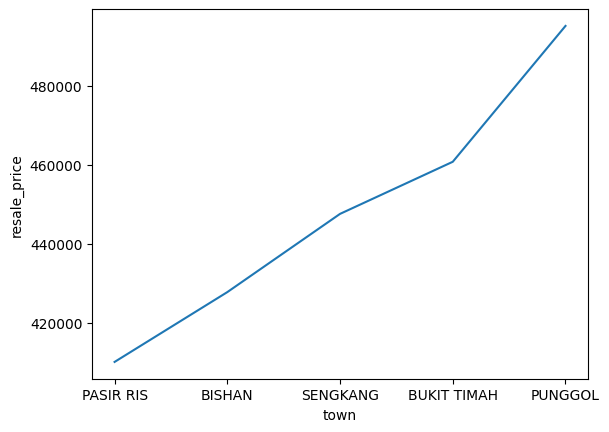

In [32]:
#You can clearly see the resale varies, In some cities the price is high compared to others.
#we can use ordinal encoding
sns.lineplot(x="town",y="resale_price",data=Town_mean.tail())

In [33]:
town_encoding = {town: rank for rank, town in enumerate(Town_mean["town"], start=1)}
df6["town_encoded"] = df6["town"].map(town_encoding)

In [34]:
with open('town_encoding.pkl', 'wb') as file:
  pickle.dump(town_encoding, file)

In [35]:
df6[["town_encoded","town"]].sort_values(by="town_encoded",ascending=True)

,town_encoded,town
28279,1,LIM CHU KANG
14335,1,LIM CHU KANG
16091,1,LIM CHU KANG
16089,1,LIM CHU KANG
18985,1,LIM CHU KANG
...,...,...
558139,27,PUNGGOL
558138,27,PUNGGOL
558137,27,PUNGGOL
558159,27,PUNGGOL


In [36]:
df6["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [37]:
flat_mean=df6.groupby('flat_type')["resale_price"].mean().reset_index()

<Axes: xlabel='flat_type', ylabel='resale_price'>

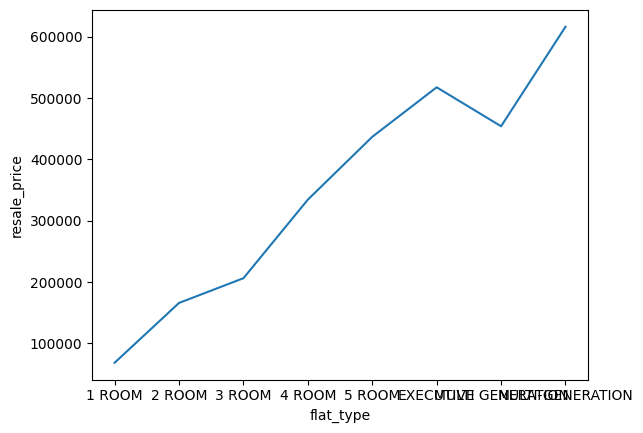

In [38]:
# The resale price varies for the flat type that has multiple facilities,so we can use ordinal Encoding
sns.lineplot(x="flat_type",y="resale_price",data=flat_mean)

In [39]:
ordinal_encoder = OrdinalEncoder()
df6["flat_type"]=ordinal_encoder.fit_transform(df6[["flat_type"]])
df6["flat_type"].unique()

array([0., 2., 3., 4., 1., 5., 6., 7.])

In [40]:
#Dumping flat_type
with open('ordinal_encoder.pkl', 'wb') as file:
  pickle.dump(ordinal_encoder, file)

In [41]:
df6["block"].unique(),df6["block"].nunique()

(array(['309', '216', '211', ..., '608B', '606D', '457A'], dtype=object), 2732)

<Axes: >

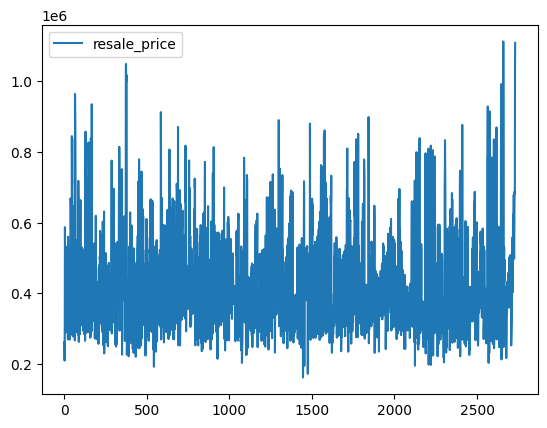

In [42]:
#As we can see there are lots of data variations in the block column.. so we can use Label encoding
df6.groupby('block')["resale_price"].mean().reset_index().plot()

In [43]:
df6["street_name"].nunique()

589

<Axes: >

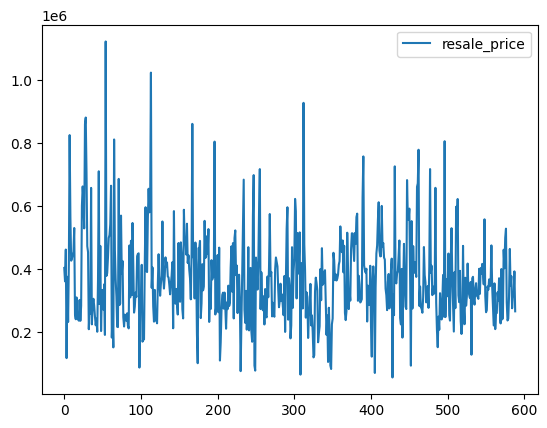

In [44]:
#As we can see there are lots of data variations in the block column.. so we can use label encoding
df6.groupby('street_name')["resale_price"].mean().reset_index().plot()

In [45]:
#Using label encoding for block and address
#since there is average cor-relation, we can keep this column

df6["block"]=LabelEncoder().fit_transform(df6["block"])
df6["street_name"]=LabelEncoder().fit_transform(df6["street_name"])

block_corr = df6["block"].corr(df6["resale_price"])
street_corr = df6["street_name"].corr(df6["resale_price"])

print(block_corr,street_corr)

0.039941384044213456 0.030323750676249518


In [46]:
#since the range of floor may vary for each location, we can split the storey range
df6["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df6["storey_range"]=le.fit_transform(df6["storey_range"])

In [48]:
with open ('storey_range_encoding.pkl','wb') as f:
  pickle.dump(le,f)

In [49]:
df6["storey_range"].corr(df6["resale_price"])

0.2439326413669011

0.5476309994920189

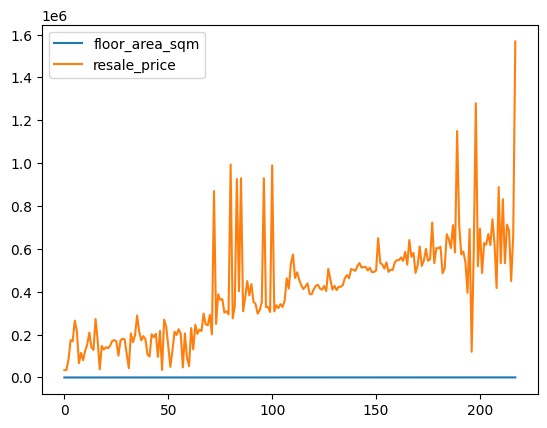

In [50]:
df6.groupby("floor_area_sqm")["resale_price"].mean().reset_index().plot()
df6["floor_area_sqm"].corr(df6["resale_price"])

In [51]:
df6["flat_model"].unique(),df6["flat_model"].nunique()

(array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
        'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
        'Maisonette', 'Multi Generation', 'Adjoined flat',
        'Premium Apartment', 'Terrace', 'Improved-Maisonette',
        'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
        'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object),
 34)

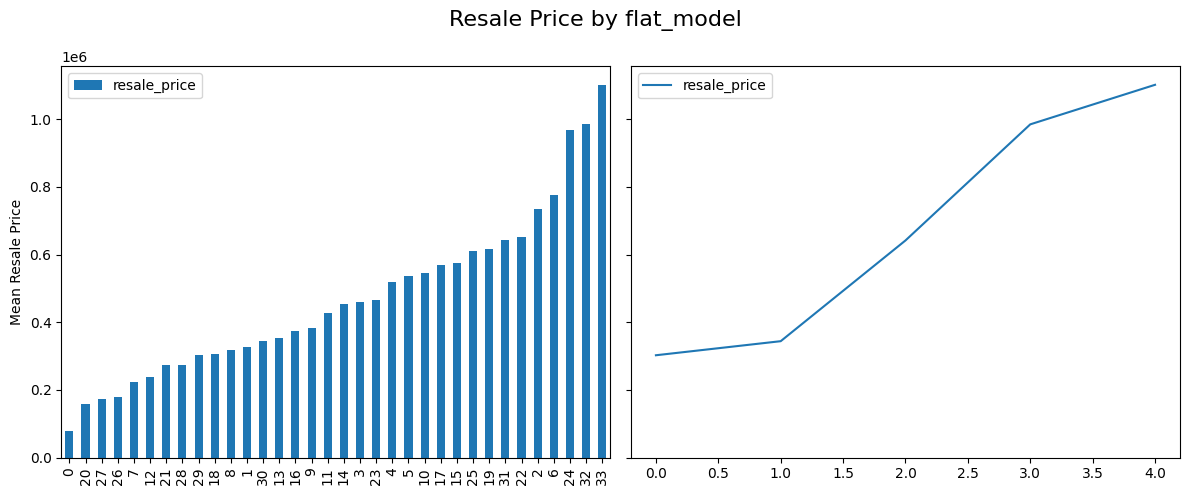

In [52]:
#since the flat_model has hierarchy,we can do orinal encoding
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df6.groupby("flat_model")["resale_price"].mean().reset_index().sort_values(by="resale_price",ascending=True).plot(kind="bar", ax=axes[0])
df6.groupby("flat_model")["resale_price"].mean().tail().reset_index().sort_values(by="resale_price",ascending=True).plot(kind="line", ax=axes[1])
fig.suptitle("Resale Price by flat_model", fontsize=16)
axes[0].set_ylabel("Mean Resale Price")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [53]:
flat_mean=df6.groupby("flat_model")["resale_price"].mean().reset_index().sort_values(by="resale_price",ascending=True)

In [54]:
flat_model_encoding=  {flat: rank for rank, flat in enumerate(flat_mean["flat_model"], start=1)}
df6["flat_model_encoded"] = df6["flat_model"].map(flat_model_encoding)

In [55]:
with open('flat_model_encoding.pkl','wb') as f:
  pickle.dump(flat_model_encoding,f)

In [56]:
df6["flat_model_encoded"].unique(),df6["flat_model"].unique()

(array([ 5,  2,  6,  3,  4, 14, 19, 17, 13,  1, 11, 18, 29, 16,  7, 15,  9,
        22,  8, 24, 25, 27, 21, 20, 28, 23, 26, 12, 10, 31, 33, 34, 32, 30]),
 array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
        'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
        'Maisonette', 'Multi Generation', 'Adjoined flat',
        'Premium Apartment', 'Terrace', 'Improved-Maisonette',
        'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
        'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object))

In [57]:
df6[["flat_model_encoded","flat_model"]].sort_values(by="flat_model_encoded",ascending=True).reset_index(drop=True)
df6["flat_model_encoded"].corr(df6["resale_price"])

0.5989947824127245

-0.06893138918432876

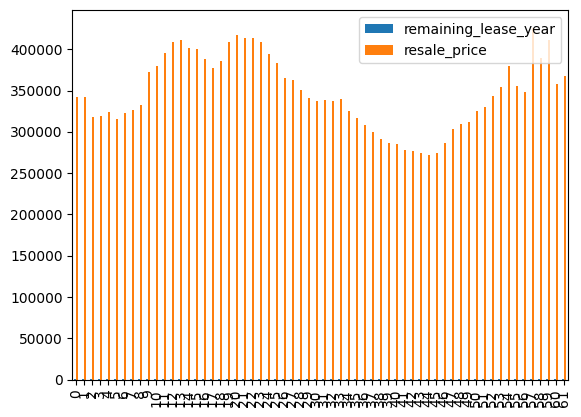

In [58]:
df6.groupby("remaining_lease_year")["resale_price"].mean().reset_index().sort_values(by="remaining_lease_year").plot(kind="bar")

df6["remaining_lease_year"].corr(df6["resale_price"])

 #there is no gradual increse or decrease over years


0.5429095503962186

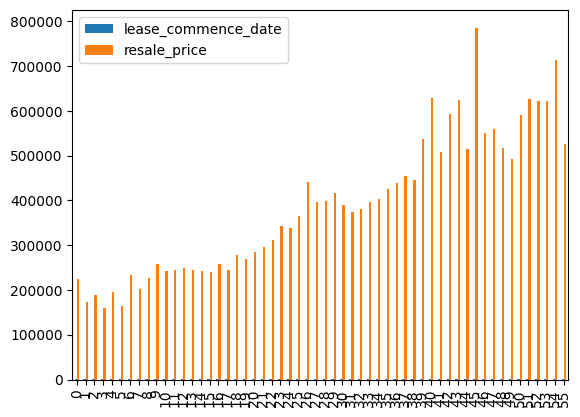

In [59]:
df6.groupby("lease_commence_date")["resale_price"].mean().reset_index().plot(kind="bar")
df6["lease_commence_date"].corr(df6["resale_price"]) #good coorelation

0.44043055420705957

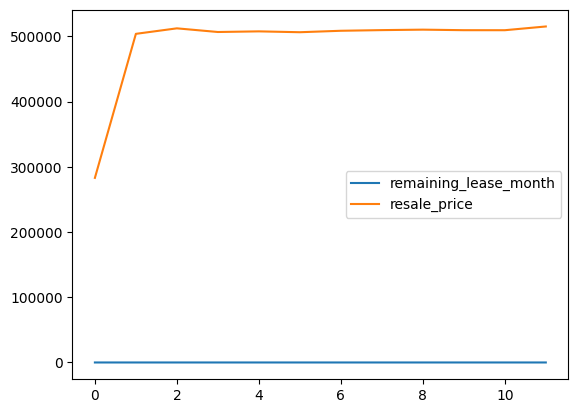

In [60]:
df6.groupby("remaining_lease_month")["resale_price"].mean().reset_index().plot()
df6["remaining_lease_month"].corr(df6["resale_price"])

0.6862260198959926

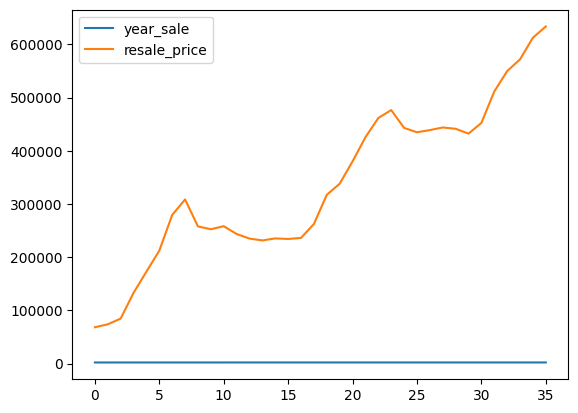

In [61]:
df6.groupby("year_sale")["resale_price"].mean().reset_index().plot()
df6["year_sale"].corr(df6["resale_price"])

#over the period of the price has increased

0.019837913866625898

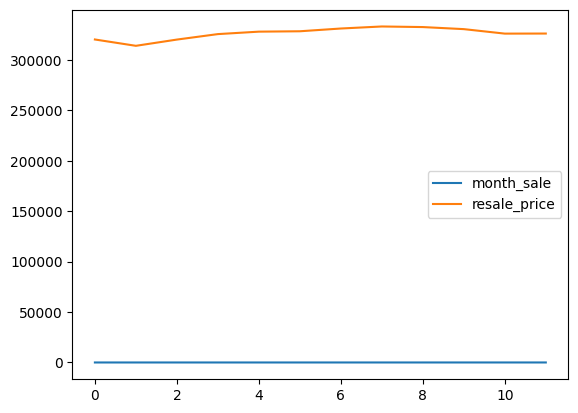

In [62]:
df6.groupby("month_sale")["resale_price"].mean().reset_index().plot()
df6["month_sale"].corr(df6["resale_price"]) #low cor-relation value

In [63]:
#since it has less correlation value,we are dropping the column
df6.drop(columns="month_sale",axis=1,inplace=True)
df6.drop(columns=["remaining_lease_year","remaining_lease_month"],axis=1,inplace=True)

#since block and address doesn't give any high importants, we are dropping the columns,

df6.drop(columns=["block","street_name"],axis=1,inplace=True)

In [64]:
df6.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year_sale,town_encoded,flat_model_encoded
0,ANG MO KIO,0.0,5,31.0,IMPROVED,1977,9000.0,1990,2,5
1,ANG MO KIO,0.0,2,31.0,IMPROVED,1977,6000.0,1990,2,5
2,ANG MO KIO,0.0,5,31.0,IMPROVED,1977,8000.0,1990,2,5
3,ANG MO KIO,0.0,4,31.0,IMPROVED,1977,6000.0,1990,2,5
4,ANG MO KIO,2.0,2,73.0,NEW GENERATION,1976,47200.0,1990,2,2


In [65]:
#dropping the actual categorical columns
df6.drop(columns=["town","flat_model"],axis=1,inplace=True)

In [66]:
df6.head()

,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price,year_sale,town_encoded,flat_model_encoded
0,0.0,5,31.0,1977,9000.0,1990,2,5
1,0.0,2,31.0,1977,6000.0,1990,2,5
2,0.0,5,31.0,1977,8000.0,1990,2,5
3,0.0,4,31.0,1977,6000.0,1990,2,5
4,2.0,2,73.0,1976,47200.0,1990,2,2


Skewness checking

In [67]:
def plot(df,column):
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column) #displot

  plt.subplot(1,3,2)
  sns.histplot(df, x=column,kde=True,bins=30,color="red")
  plt.title("histplot for"+" "+column) #histplot

  plt.subplot(1,3,3)
  sns.boxplot(df,x=column)
  plt.title("boxplot for"+" "+column) #boxplot

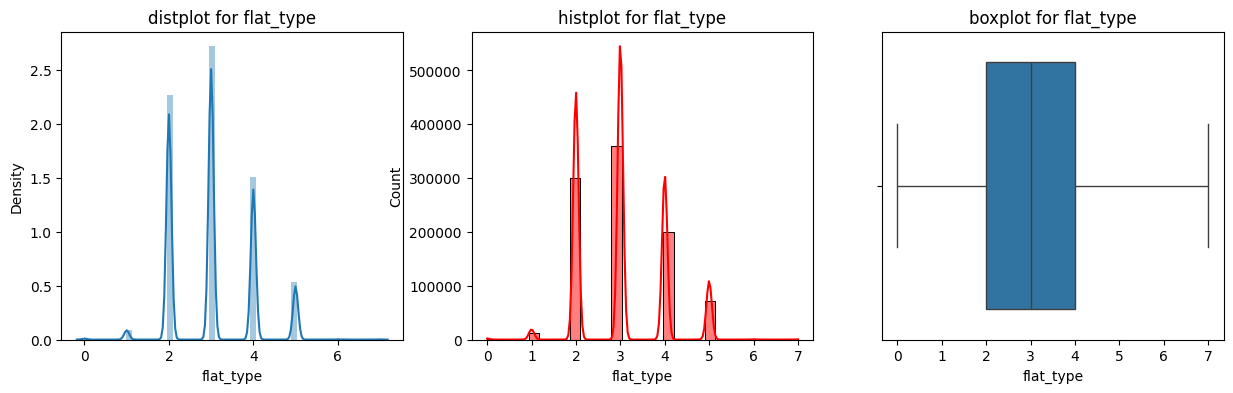

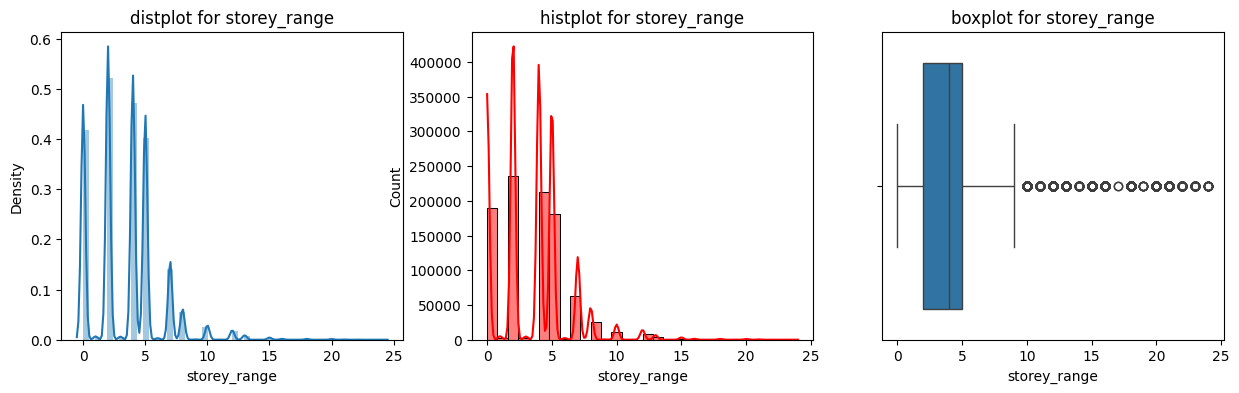

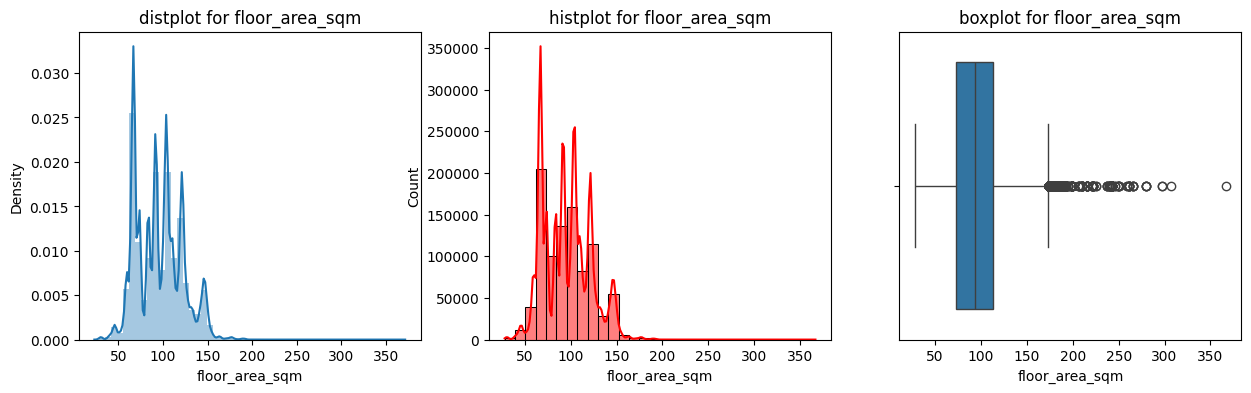

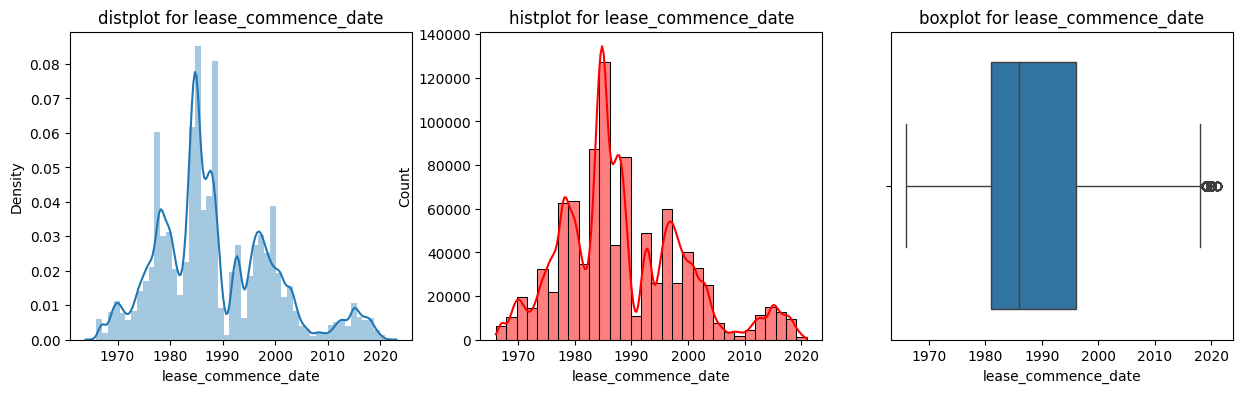

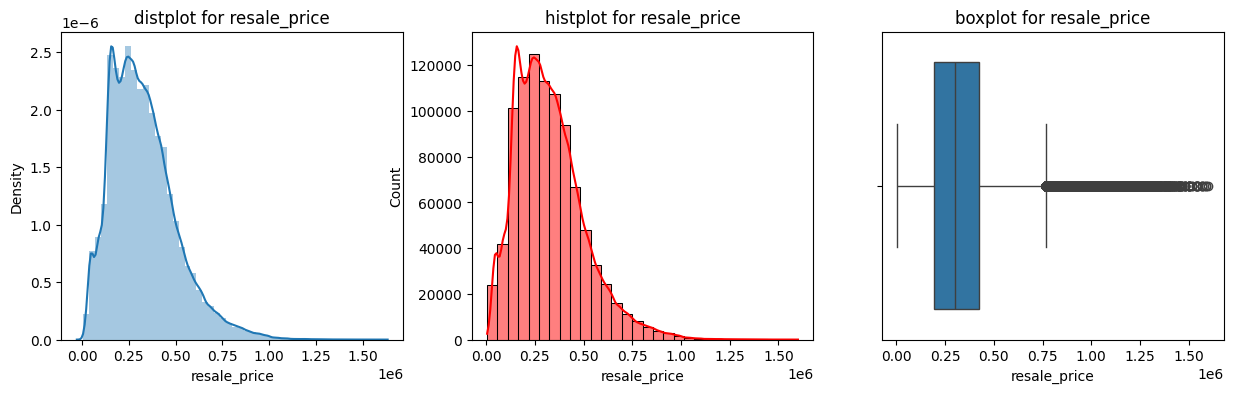

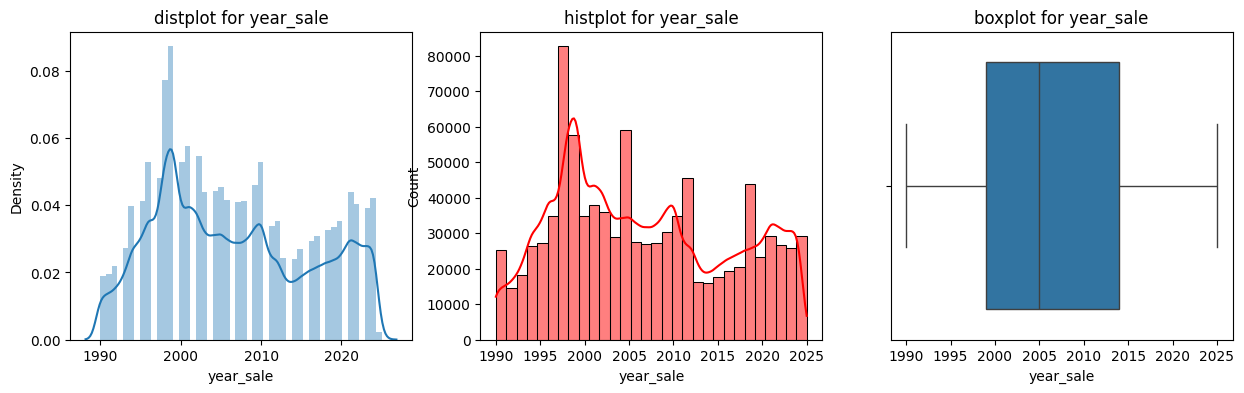

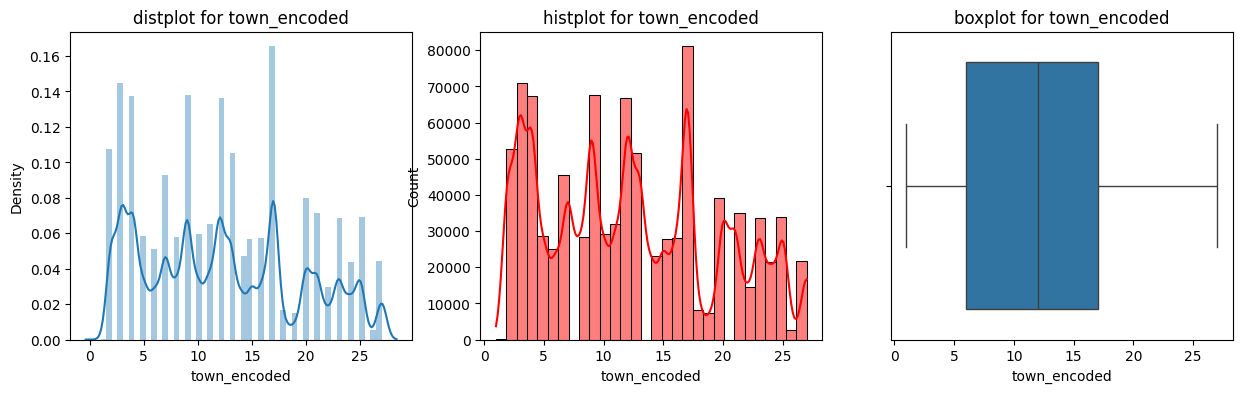

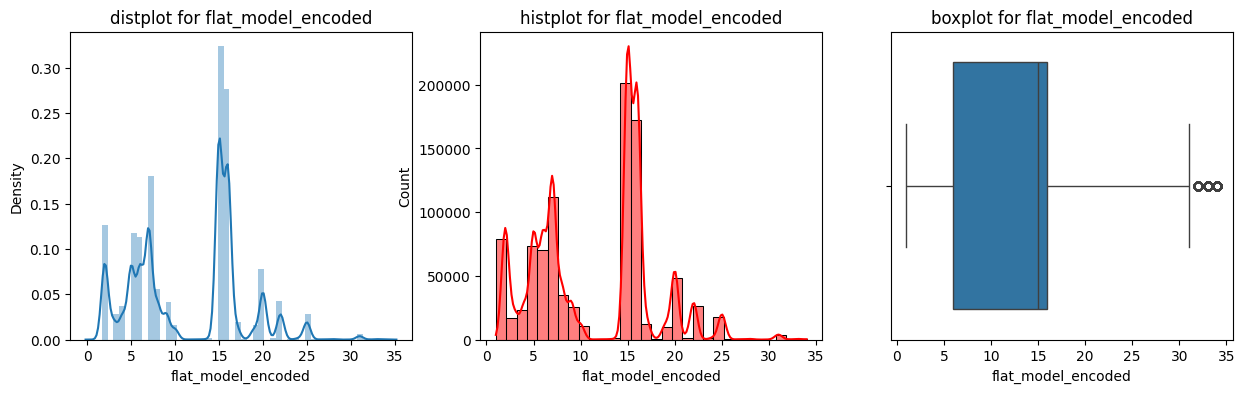

In [68]:
for i in df6.columns:
  plot(df6,i)

In [69]:
df6.skew().sort_values(ascending=False)

,0
storey_range,1.116537
resale_price,0.980180
lease_commence_date,0.664897
flat_type,0.393938
floor_area_sqm,0.365289
town_encoded,0.293801
year_sale,0.287203
flat_model_encoded,0.171765


Skew Handling

<Axes: >

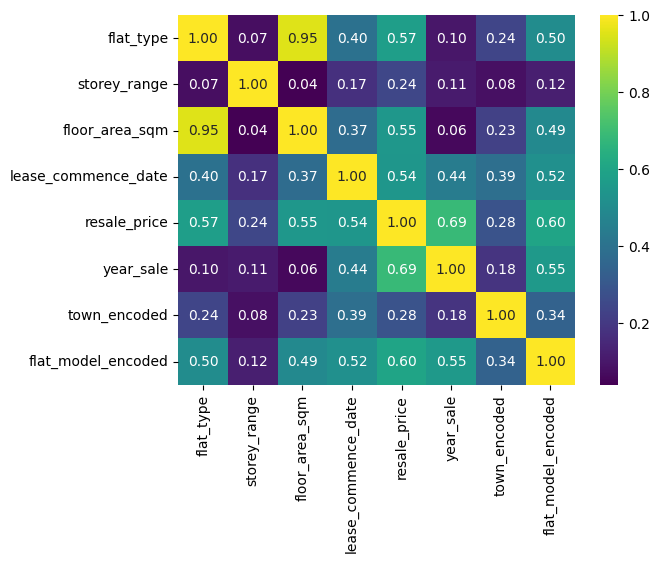

In [70]:
sns.heatmap(df6.corr(),annot=True,fmt="0.2f",cmap="viridis")

In [71]:
#since few column has skewed data, we will replace it with mathematical functions
df7=df6.copy()

In [72]:
#remaining_lease_month,storey_range,resale_price - postively skewed
#remaining_lease_year -  negatively skewed
#we can use np.log or np.log1p

df7["storey_range"]=np.log1p(df7["storey_range"])
df7["resale_price"]=np.log(df7["resale_price"])

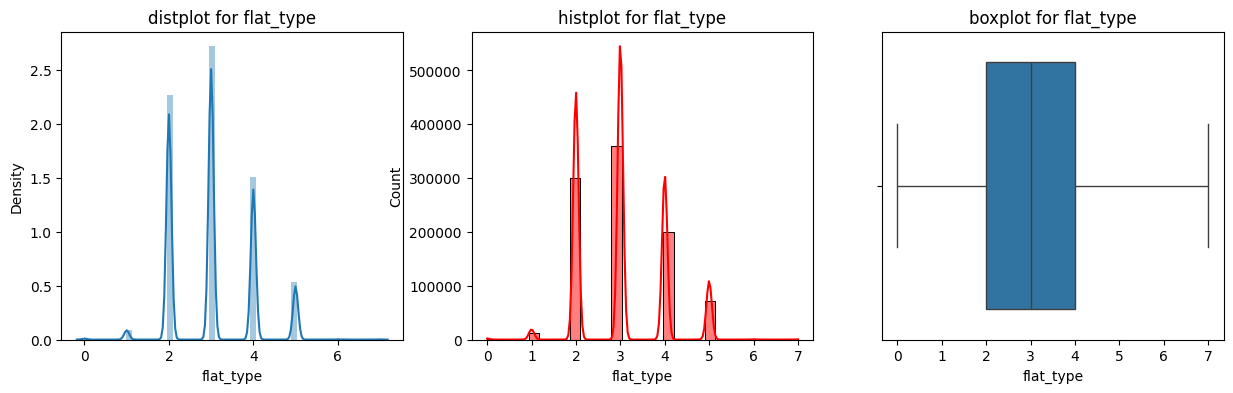

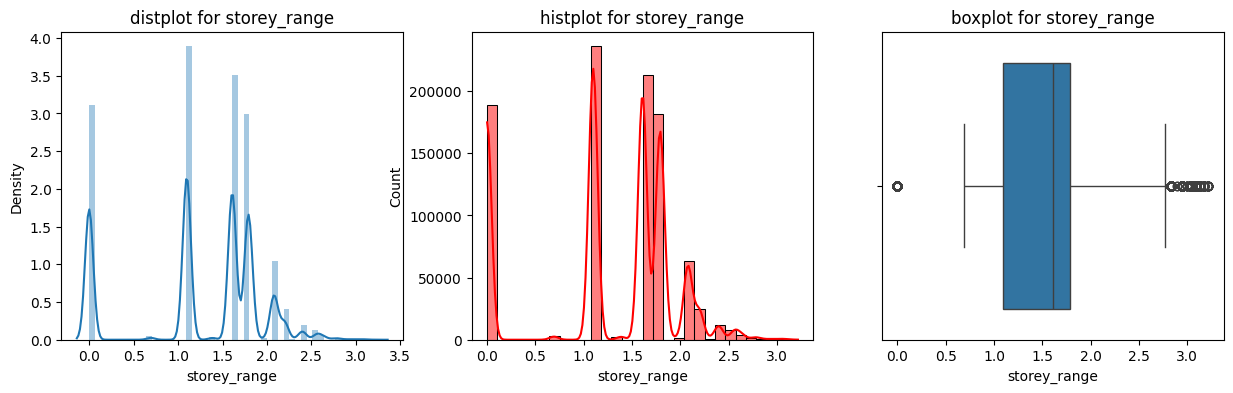

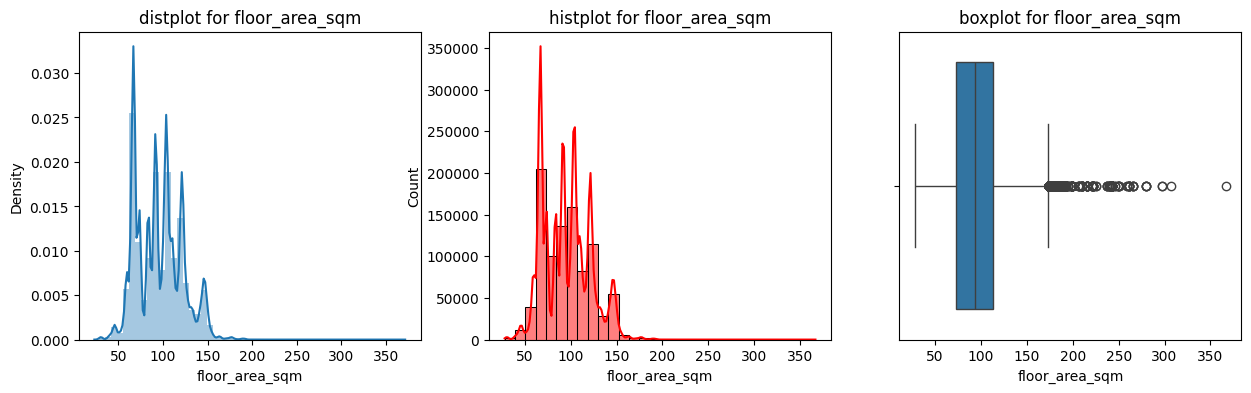

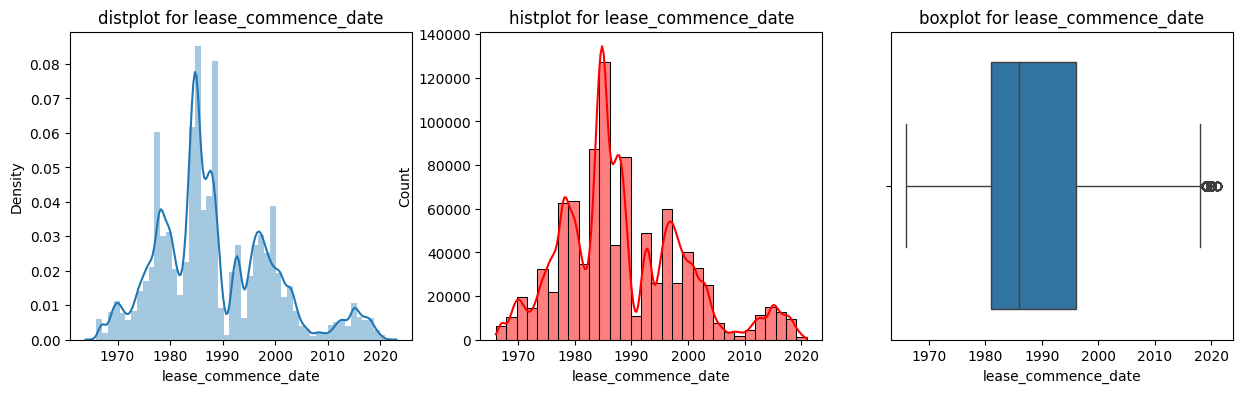

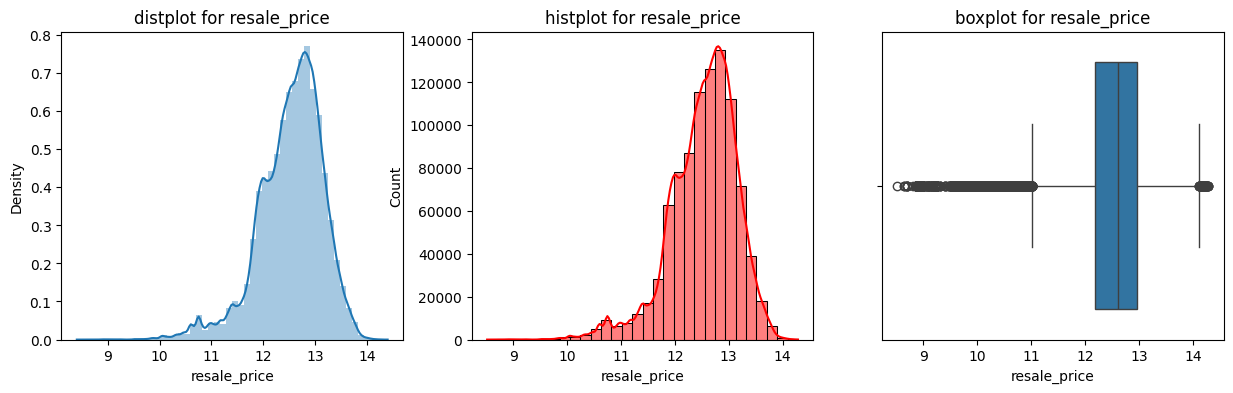

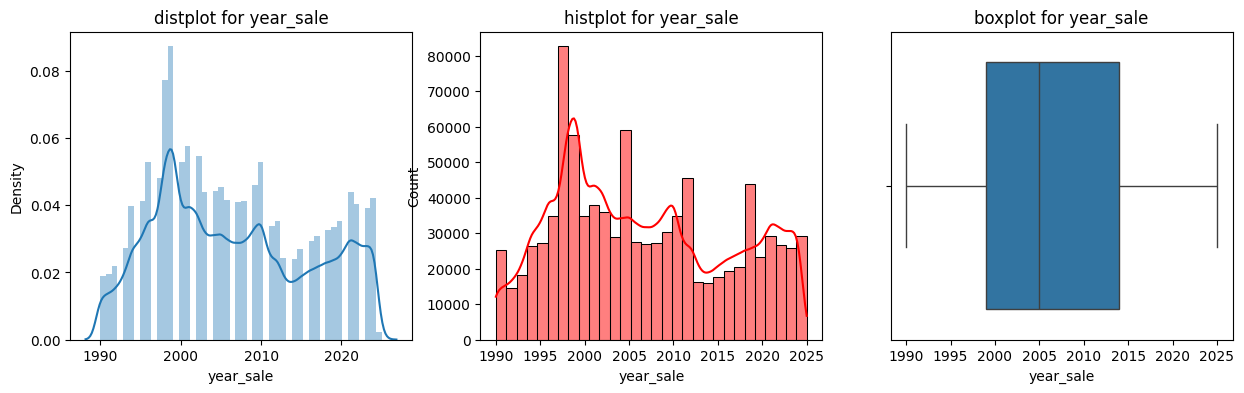

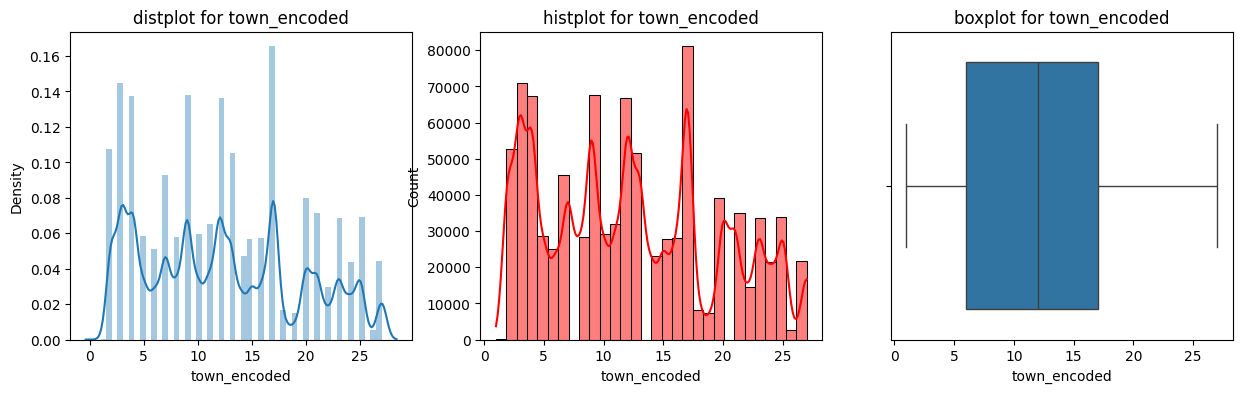

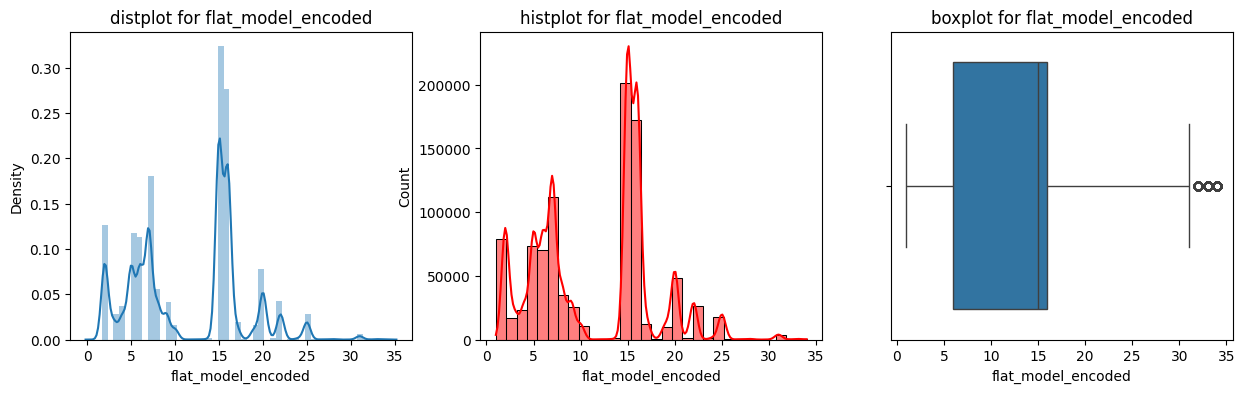

In [73]:
for i in df7.columns:
  plot(df7,i)

In [74]:
df6.skew(),df7.skew()

(flat_type              0.393938
 storey_range           1.116537
 floor_area_sqm         0.365289
 lease_commence_date    0.664897
 resale_price           0.980180
 year_sale              0.287203
 town_encoded           0.293801
 flat_model_encoded     0.171765
 dtype: float64,
 flat_type              0.393938
 storey_range          -0.649487
 floor_area_sqm         0.365289
 lease_commence_date    0.664897
 resale_price          -0.900006
 year_sale              0.287203
 town_encoded           0.293801
 flat_model_encoded     0.171765
 dtype: float64)

In [75]:
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
flat_type,942707.0,3.015771,0.948791,0.000000,2.000000,3.000000,4.000000,7.000000
storey_range,942707.0,1.265174,0.725568,0.000000,1.098612,1.609438,1.791759,3.218876
floor_area_sqm,942707.0,95.707248,25.789912,28.000000,73.000000,93.000000,113.000000,366.700000
lease_commence_date,942707.0,1988.463063,10.843280,1966.000000,1981.000000,1986.000000,1996.000000,2021.000000
resale_price,942707.0,12.534040,0.615994,8.517193,12.180755,12.611538,12.957489,14.285514
year_sale,942707.0,2006.504426,9.543795,1990.000000,1999.000000,2005.000000,2014.000000,2025.000000
town_encoded,942707.0,12.330902,7.170452,1.000000,6.000000,12.000000,17.000000,27.000000
flat_model_encoded,942707.0,11.545839,6.224936,1.000000,6.000000,15.000000,16.000000,34.000000


#Outlier handling

In [76]:
for feature in df7.columns:
  print(f"Feature name - {feature}")
  iqr=df7[feature].quantile(0.75)-df7[feature].quantile(0.25)
  upper_threshold=df7[feature].quantile(0.75)+(1.5*iqr)
  lower_threshold=df7[feature].quantile(0.25)-(1.5*iqr)
  print(f"Lower threshold : {lower_threshold},Upper threshold : {upper_threshold}")
  print(df7[feature].describe())
  print("")
  df7[feature]=df7[feature].clip(lower_threshold,upper_threshold)
  print(f"Lower threshold : {lower_threshold},Upper threshold : {upper_threshold}")
  print(df7[feature].describe())
  print("")

Feature name - flat_type
Lower threshold : -1.0,Upper threshold : 7.0
count    942707.000000
mean          3.015771
std           0.948791
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: flat_type, dtype: float64

Lower threshold : -1.0,Upper threshold : 7.0
count    942707.000000
mean          3.015771
std           0.948791
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: flat_type, dtype: float64

Feature name - storey_range
Lower threshold : 0.058891517828191464,Upper threshold : 2.831480240067973
count    942707.000000
mean          1.265174
std           0.725568
min           0.000000
25%           1.098612
50%           1.609438
75%           1.791759
max           3.218876
Name: storey_range, dtype: float64

Lower threshold : 0.058891517828191464,Upper threshold : 2.831480240067973
count    942707.000000
mean          1.276679
std    

Splitting data for train and test

In [77]:
 from sklearn.model_selection import train_test_split
 X=df7.drop(columns="resale_price",axis=1)
 y=df7["resale_price"]

 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
 X_train.shape,X_test.shape,y_train.shape,y_test.shape


((754165, 7), (188542, 7), (754165,), (188542,))

#Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_train_pred=lr_model.predict(X_train)
y_pred=lr_model.predict(X_test)
print(f"Training set -  MAE:{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},,R2 score : {r2_score(y_train,y_train_pred)}")
print(f" Test set - MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")

Training set -  MAE:0.2080496663224866,MSE : 0.0706510912922724,RMSE : 0.26580273003163907,,R2 score : 0.7916660321169157
 Test set - MAE : 0.20848684643963591,MSE : 0.07077075351125481,RMSE : 0.2660277307185377,R2 score : 0.7919571401307968


In [79]:
#Dumping Linear Regression Model
with open ('linear_regression_model.pkl','wb') as f:
  pickle.dump(lr_model,f)


In [80]:
#checking the value prediction
comparison_df=pd.DataFrame({"Actuacl_test":y_test, "Predicted_test":y_pred})
comparison_df

,Actuacl_test,Predicted_test
788377,12.712890,12.678679
30239,11.015654,11.522614
328800,12.417144,12.320897
460003,12.144197,12.240514
386124,12.206073,12.320585
...,...,...
77305,12.807653,12.690681
815445,13.176852,13.440572
17373,11.015654,11.602512
709049,13.208541,13.329648


In [81]:
#checking the importance of the columns:
feature_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_model.coef_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Attribute,Importance
0,flat_type,0.076544
1,storey_range,0.056100
4,year_sale,0.041096
2,floor_area_sqm,0.009768
5,town_encoded,0.003988
3,lease_commence_date,0.002702
6,flat_model_encoded,-0.008184


#Decision Tree Regressor

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

for depth in range(10,21):
  # Initialize and fit DecisionTreeRegressor
  DTR_model=DecisionTreeRegressor(max_depth=depth,random_state=42)
  DTR_model.fit(X_train,y_train)

  # Predictions
  y_train_pred=DTR_model.predict(X_train)
  y_test_pred=DTR_model.predict(X_test)

  # Metrics for training set
  train_mae = mean_absolute_error(y_train, y_train_pred)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_rmse = np.sqrt(train_mse)
  train_r2 = r2_score(y_train, y_train_pred)

  # Metrics for test set
  test_mae = mean_absolute_error(y_test, y_test_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_rmse = np.sqrt(test_mse)
  test_r2 = r2_score(y_test, y_test_pred)

  # Cross-Validation Score
  cv_score = np.mean(cross_val_score(DTR_model, X_train, y_train, cv=10, scoring="r2"))


  # Print results
  print(f"Depth: {depth}")
  print(f"Training set - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, R2: {train_r2}")
  print(f"Test set     - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, R2: {test_r2}")
  print(f"Cross-Validation Score (R2): {cv_score}")
  print("")

Depth: 10
Training set - MAE: 0.10737532311942508, MSE: 0.020810589033455094, RMSE: 0.14425875721582762, R2: 0.9386343153655136
Test set     - MAE: 0.10785542381181032, MSE: 0.02100176141000994, RMSE: 0.14491984477637954, R2: 0.9382616930122938
Cross-Validation Score (R2): 0.9379958493404009

Depth: 11
Training set - MAE: 0.10161337121443655, MSE: 0.01881578416592259, RMSE: 0.13717063886241324, R2: 0.9445165403333675
Test set     - MAE: 0.10249229188553993, MSE: 0.019141920140944176, RMSE: 0.13835432823350405, R2: 0.9437290178226432
Cross-Validation Score (R2): 0.9433975997326078

Depth: 12
Training set - MAE: 0.0950180728838025, MSE: 0.01669272215750381, RMSE: 0.12920031794660494, R2: 0.9507769663817914
Test set     - MAE: 0.09628966867865565, MSE: 0.017174035953450992, RMSE: 0.13104974610219966, R2: 0.949513953462651
Cross-Validation Score (R2): 0.9490356534467936

Depth: 13
Training set - MAE: 0.08836016393446927, MSE: 0.014645026547193685, RMSE: 0.12101663748094178, R2: 0.956815154

In [105]:
for depth in range(20,25):
  # Initialize and fit DecisionTreeRegressor
  DTR_model=DecisionTreeRegressor(max_depth=depth,random_state=42)
  DTR_model.fit(X_train,y_train)

  # Predictions
  y_train_pred=DTR_model.predict(X_train)
  y_test_pred=DTR_model.predict(X_test)

  # Metrics for training set
  train_mae = mean_absolute_error(y_train, y_train_pred)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_rmse = np.sqrt(train_mse)
  train_r2 = r2_score(y_train, y_train_pred)

  # Metrics for test set
  test_mae = mean_absolute_error(y_test, y_test_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_rmse = np.sqrt(test_mse)
  test_r2 = r2_score(y_test, y_test_pred)

  # Cross-Validation Score
  cv_score = np.mean(cross_val_score(DTR_model, X_train, y_train, cv=10, scoring="r2"))


  # Print results
  print(f"Depth: {depth}")
  print(f"Training set - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, R2: {train_r2}")
  print(f"Test set     - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, R2: {test_r2}")
  print(f"Cross-Validation Score (R2): {cv_score}")
  print("")



Depth: 20
Training set - MAE: 0.05220808646497194, MSE: 0.005794008185586933, RMSE: 0.07611838270475098, R2: 0.9829147902293984
Test set     - MAE: 0.06751401827625979, MSE: 0.009426624985697586, RMSE: 0.09709080793616658, R2: 0.9722888068356214
Cross-Validation Score (R2): 0.9712508934442008

Depth: 21
Training set - MAE: 0.04891623403206335, MSE: 0.005234679003977187, RMSE: 0.07235108156743192, R2: 0.984564124523125
Test set     - MAE: 0.06699149157400226, MSE: 0.009385627203002279, RMSE: 0.09687944675214799, R2: 0.9724093269026978
Cross-Validation Score (R2): 0.9714959753199917

Depth: 22
Training set - MAE: 0.04612298140400299, MSE: 0.0048130141749191556, RMSE: 0.06937589044415327, R2: 0.9858075180128447
Test set     - MAE: 0.06676456490586963, MSE: 0.009406074363847036, RMSE: 0.09698491822880007, R2: 0.9723492189399123
Cross-Validation Score (R2): 0.9714742048186071

Depth: 23
Training set - MAE: 0.043776510362369694, MSE: 0.004481530556135898, RMSE: 0.06694423467436085, R2: 0.986

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

#Best depth = 21

DTR_model=DecisionTreeRegressor(max_depth=21,random_state=42)
DTR_model.fit(X_train,y_train)

# Predictions
y_train_pred=DTR_model.predict(X_train)
y_test_pred=DTR_model.predict(X_test)

# Metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation Score
cv_score = np.mean(cross_val_score(DTR_model, X_train, y_train, cv=10, scoring="r2"))


# Print results
print(f"Depth: 21")
print(f"Training set - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, R2: {train_r2}")
print(f"Test set     - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, R2: {test_r2}")
print(f"Cross-Validation Score (R2): {cv_score}")
print("")



Depth: 21
Training set - MAE: 0.04891623403206335, MSE: 0.005234679003977187, RMSE: 0.07235108156743192, R2: 0.984564124523125
Test set     - MAE: 0.06699149157400226, MSE: 0.009385627203002279, RMSE: 0.09687944675214799, R2: 0.9724093269026978
Cross-Validation Score (R2): 0.9714959753199917



In [86]:
#Decision Tree model
with open("DTR_model.pkl","wb") as f:
  pickle.dump(DTR_model,f)

#finding the best hyperparameters for a model

In [87]:
'''from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [19,10,21,22,23],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10]  # Minimum samples in a leaf node
}

# Initialize the DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DTR,
    param_grid=param_grid,
    cv=10,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1,  # Use all available processors
    verbose=1  # Show progress
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Test R² Score:", test_r2)'''


'from sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define parameter grid\nparam_grid = {\n    \'max_depth\': [19,10,21,22,23],  # Depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum samples required to split a node\n    \'min_samples_leaf\': [1, 2, 5, 10]  # Minimum samples in a leaf node\n}\n\n# Initialize the DecisionTreeRegressor\nDTR = DecisionTreeRegressor(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=DTR,\n    param_grid=param_grid,\n    cv=10,  # 5-fold cross-validation\n    scoring=\'r2\',  # Optimize for R² score\n    n_jobs=-1,  # Use all available processors\n    verbose=1  # Show progress\n)\n\n# Fit the grid search\ngrid_search.fit(X_train, y_train)\n\n# Best parameters and score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation R² Score:", grid_search.best_score_)\n\n# Use the best model\nbest_model = grid_search.best_estimator_

In [88]:
#Since the model has large data, RandomForestRegressor model takes more time to run, so I have done few iteration and have choosen best range for estimation.

#Random Forest Algorithm

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.model_selection import cross_val_score

for n in range(80,101,10):
  RF_model=RandomForestRegressor(n_estimators=n, max_depth=10)
  RF_model.fit(X_train,y_train)
  y_train_pred=RF_model.predict(X_train)
  y_pred=RF_model.predict(X_test)

  print(f"n_estimators : {n}")
  print(f"Training set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},,R2 score : {r2_score(y_train,y_train_pred)}")
  print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")
  print(f"cross_val_score     : {np.mean(cross_val_score(RF_model,X_train,y_train,cv=10))}")
  print("")

n_estimators : 80
Training set -  MAE :0.10491284469979541,MSE : 0.01980101673925936,RMSE : 0.1407160855739647,,R2 score : 0.941611313994516
Test set     -  MAE : 0.1053606724015982,MSE : 0.0199723379777506,RMSE : 0.14132352237950552,R2 score : 0.9412878610865046
cross_val_score     : 0.9410681936172768

n_estimators : 90
Training set -  MAE :0.10499894020041978,MSE : 0.019821224313908432,RMSE : 0.14078786991040254,,R2 score : 0.941551726461883
Test set     -  MAE : 0.10543204153023283,MSE : 0.019990441318638988,RMSE : 0.14138755715634593,R2 score : 0.9412346431875175
cross_val_score     : 0.9410542166685646

n_estimators : 100
Training set -  MAE :0.10488290512609875,MSE : 0.01977356032471712,RMSE : 0.14061849211507396,,R2 score : 0.9416922767040907
Test set     -  MAE : 0.10531275787747776,MSE : 0.019939183843014862,RMSE : 0.14120617494647628,R2 score : 0.9413853233949399
cross_val_score     : 0.9410446085023858



Training the Random Forest Regressor without max_depth

In [90]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.model_selection import cross_val_score

for n in range(90,121,10):
  RF_model=RandomForestRegressor(n_estimators=n)
  RF_model.fit(X_train,y_train)
  y_train_pred=RF_model.predict(X_train)
  y_pred=RF_model.predict(X_test)

  print(f"n_estimators : {n}")
  print(f"Training set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},,R2 score : {r2_score(y_train,y_train_pred)}")
  print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")
  print(f"cross_val_score     : {np.mean(cross_val_score(RF_model,X_train,y_train,cv=10))}")
  print("")'''

'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score\nfrom sklearn.model_selection import cross_val_score\n\nfor n in range(100,121,10):\n  RF_model=RandomForestRegressor(n_estimators=n)\n  RF_model.fit(X_train,y_train)\n  y_train_pred=RF_model.predict(X_train)\n  y_pred=RF_model.predict(X_test)\n\n  print(f"n_estimators : {n}")\n  print(f"Training set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},,R2 score : {r2_score(y_train,y_train_pred)}")\n  print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")\n  print(f"cross_val_score     : {np.mean(cross_val_score(RF_model,X_train,y_train,cv=10))}")\n  print("")'

In [102]:
#best Randomforest model =110

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.model_selection import cross_val_score

RF_model=RandomForestRegressor(n_estimators=110)
RF_model.fit(X_train,y_train)
y_train_pred=RF_model.predict(X_train)
y_pred=RF_model.predict(X_test)

print(f"n_estimators : {110}")
print(f"Training set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},,R2 score : {r2_score(y_train,y_train_pred)}")
print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")
print(f"cross_val_score     : {np.mean(cross_val_score(RF_model,X_train,y_train,cv=10))}")
print("")

n_estimators : 110
Training set -  MAE :0.04279240991495037,MSE : 0.004005146111061654,RMSE : 0.0632862237067567,,R2 score : 0.988189736831988
Test set     -  MAE : 0.06247373862081316,MSE : 0.00796880763851996,RMSE : 0.08926817819648813,R2 score : 0.9765743128536621
cross_val_score     : 0.9760637134061667



In [103]:
import joblib

joblib.dump(RF_model,'Random_forest_model.pkl',compress=3)

['Random_forest_model.pkl']

In [92]:
with open ("RF_model.pkl","wb") as f:
  pickle.dump(RF_model,f)

#Gradient Boosting Algorithm

In [93]:
'''from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

for n in range(140,171,10):
  GBR_model=GradientBoostingRegressor(n_estimators=n)
  GBR_model.fit(X_train,y_train)
  y_train_pred=GBR_model.predict(X_train)
  y_pred=GBR_model.predict(X_test)
  print(f"n_estimators : {n}")
  print(f"Training_set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},R2 score : {r2_score(y_train,y_train_pred)}")
  print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")
  print(f"cross_val_score     : {np.mean(cross_val_score(GBR_model,X_train,y_train,cv=10))}")
  print("")'''

'from sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score\nfrom sklearn.model_selection import cross_val_score\n\nfor n in range(140,171,10):\n  GBR_model=GradientBoostingRegressor(n_estimators=n)\n  GBR_model.fit(X_train,y_train)\n  y_train_pred=GBR_model.predict(X_train)\n  y_pred=GBR_model.predict(X_test)\n  print(f"n_estimators : {n}")\n  print(f"Training_set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},R2 score : {r2_score(y_train,y_train_pred)}")\n  print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")\n  print(f"cross_val_score     : {np.mean(cross_val_score(GBR_model,X_train,y_train,cv=10))}")\n  print("")'

In [94]:
#Best_GradientBoostingRegressor_model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

GBR_model=GradientBoostingRegressor(n_estimators=170)
GBR_model.fit(X_train,y_train)
y_train_pred=GBR_model.predict(X_train)
y_pred=GBR_model.predict(X_test)
print(f"n_estimators : {170}")
print(f"Training_set -  MAE :{mean_absolute_error(y_train,y_train_pred)},MSE : {mean_squared_error(y_train,y_train_pred)},RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))},R2 score : {r2_score(y_train,y_train_pred)}")
print(f"Test set     -  MAE : {mean_absolute_error(y_test,y_pred)},MSE : {mean_squared_error(y_test,y_pred)},RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)}")
print(f"cross_val_score     : {np.mean(cross_val_score(GBR_model,X_train,y_train,cv=10))}")
print("")



n_estimators : 170
Training_set -  MAE :0.09005493854161788,MSE : 0.014125593530129987,RMSE : 0.11885114021384055,R2 score : 0.9583468436933049
Test set     -  MAE : 0.08992863239876255,MSE : 0.014038594018128122,RMSE : 0.11848457291195391,R2 score : 0.9587311268685363
cross_val_score     : 0.9576471249592696



In [95]:
with open("GradientBoostingRegressor.pkl","wb") as f:
  pickle.dump(GBR_model,f)

#XG Boosting Algorithm

In [96]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for lamb in [0.05, 0.1, 0.5, 1]:
    XGB_model = XGBRegressor(learning_rate=lamb)

    scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        XGB_model.fit(X_train_fold, y_train_fold)
        y_val_pred = XGB_model.predict(X_val_fold)
        scores.append(r2_score(y_val_fold, y_val_pred))

    XGB_model.fit(X_train, y_train)
    y_train_pred = XGB_model.predict(X_train)
    y_test_pred = XGB_model.predict(X_test)

    print(f"Learning rate: {lamb}")
    print(f"Training set -  MAE: {mean_absolute_error(y_train, y_train_pred)}, "
          f"MSE: {mean_squared_error(y_train, y_train_pred)}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}, "
          f"R2 score: {r2_score(y_train, y_train_pred)}")

    print(f"Test set -  MAE: {mean_absolute_error(y_test, y_test_pred)}, "
          f"MSE: {mean_squared_error(y_test, y_test_pred)}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}, "
          f"R2 score: {r2_score(y_test, y_test_pred)}")

    print(f"Average Cross-Validation R2 Score: {np.mean(scores)}\n")


Learning rate: 0.05
Training set -  MAE: 0.08933271140574292, MSE: 0.014007270290405093, RMSE: 0.11835231425876341, R2 score: 0.9586957519631389
Test set -  MAE: 0.08941551448658824, MSE: 0.014005309510969153, RMSE: 0.11834403031403465, R2 score: 0.9588289724292394
Average Cross-Validation R2 Score: 0.958726659915146

Learning rate: 0.1
Training set -  MAE: 0.07433448237399529, MSE: 0.009876675854991279, RMSE: 0.09938146635561018, R2 score: 0.9708759336518494
Test set -  MAE: 0.07433133218284214, MSE: 0.009852862414825417, RMSE: 0.09926158579644705, R2 score: 0.9710358082544356
Average Cross-Validation R2 Score: 0.9702495659759048

Learning rate: 0.5
Training set -  MAE: 0.06511545539910486, MSE: 0.00781577115483445, RMSE: 0.08840685015786079, R2 score: 0.9769530719629391
Test set -  MAE: 0.06553887144656732, MSE: 0.007906771990224508, RMSE: 0.0889200314340054, R2 score: 0.9767566773622324
Average Cross-Validation R2 Score: 0.976422631794339

Learning rate: 1
Training set -  MAE: 0.064

In [97]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for lamb in [0.7, 0.8, 0.9]:
    XGB_model = XGBRegressor(learning_rate=lamb)

    scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        XGB_model.fit(X_train_fold, y_train_fold)
        y_val_pred = XGB_model.predict(X_val_fold)
        scores.append(r2_score(y_val_fold, y_val_pred))

    XGB_model.fit(X_train, y_train)
    y_train_pred = XGB_model.predict(X_train)
    y_test_pred = XGB_model.predict(X_test)

    print(f"Learning rate: {lamb}")
    print(f"Training set -  MAE: {mean_absolute_error(y_train, y_train_pred)}, "
          f"MSE: {mean_squared_error(y_train, y_train_pred)}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}, "
          f"R2 score: {r2_score(y_train, y_train_pred)}")

    print(f"Test set -  MAE: {mean_absolute_error(y_test, y_test_pred)}, "
          f"MSE: {mean_squared_error(y_test, y_test_pred)}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}, "
          f"R2 score: {r2_score(y_test, y_test_pred)}")

    print(f"Average Cross-Validation R2 Score: {np.mean(scores)}\n")


Learning rate: 0.7
Training set -  MAE: 0.06411392311276004, MSE: 0.0076380637162200464, RMSE: 0.08739601659240566, R2 score: 0.9774770907025184
Test set -  MAE: 0.06478200371484877, MSE: 0.007800671609277683, RMSE: 0.08832141082024043, R2 score: 0.9770685777672758
Average Cross-Validation R2 Score: 0.9765183263652887

Learning rate: 0.8
Training set -  MAE: 0.06413209367165655, MSE: 0.007641334830176631, RMSE: 0.08741472890867208, R2 score: 0.9774674449328989
Test set -  MAE: 0.06489809669369521, MSE: 0.007828601601393944, RMSE: 0.08847938517753129, R2 score: 0.9769864727288567
Average Cross-Validation R2 Score: 0.9767460229726297

Learning rate: 0.9
Training set -  MAE: 0.06411286946401343, MSE: 0.007635055424160986, RMSE: 0.08737880420422899, R2 score: 0.9774859614702553
Test set -  MAE: 0.0649287067640692, MSE: 0.007845664784432932, RMSE: 0.08857575731786284, R2 score: 0.976936312553618
Average Cross-Validation R2 Score: 0.9765006975855363



In [100]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)


XGB_model = XGBRegressor(learning_rate=0.8)

scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    XGB_model.fit(X_train_fold, y_train_fold)
    y_val_pred = XGB_model.predict(X_val_fold)
    scores.append(r2_score(y_val_fold, y_val_pred))

XGB_model.fit(X_train, y_train)
y_train_pred = XGB_model.predict(X_train)
y_test_pred = XGB_model.predict(X_test)

print(f"Learning rate: {0.8}")
print(f"Training set -  MAE: {mean_absolute_error(y_train, y_train_pred)}, "
      f"MSE: {mean_squared_error(y_train, y_train_pred)}, "
      f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}, "
      f"R2 score: {r2_score(y_train, y_train_pred)}")

print(f"Test set -  MAE: {mean_absolute_error(y_test, y_test_pred)}, "
      f"MSE: {mean_squared_error(y_test, y_test_pred)}, "
      f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}, "
      f"R2 score: {r2_score(y_test, y_test_pred)}")

print(f"Average Cross-Validation R2 Score: {np.mean(scores)}\n")

Learning rate: 0.8
Training set -  MAE: 0.06413209367165655, MSE: 0.007641334830176631, RMSE: 0.08741472890867208, R2 score: 0.9774674449328989
Test set -  MAE: 0.06489809669369521, MSE: 0.007828601601393944, RMSE: 0.08847938517753129, R2 score: 0.9769864727288567
Average Cross-Validation R2 Score: 0.9767460229726297



In [99]:
with open ("XGB_model.pkl","wb") as f:
  pickle.dump(XGB_model,f)